In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import yaml

from utils import *

**Problem A: Use Markov chain Monte Carlo and the Metropolis-Hastings algorithm to simulate the 2D Ising
model at different temperatures T and magnetic field strengths B. Discuss your strategy for determining
the initial configuration, burn-in steps, total number of steps, and thinning (if any)**

In [69]:
#getting the parameters from the yaml file
with open("config.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
print(config)
STEPS = config['STEPS']
N = config['N']
J = config['J']
KB = config['KB']
#T = config['T']
BURNIN = config['BURNIN']

{'STEPS': 1000000, 'N': 30, 'J': 1, 'KB': 1, 'T': 2, 'BURNIN': 100000, 'B': 1, 'T_C': 2.269}


  0%|          | 0/1000000 [00:00<?, ?it/s]

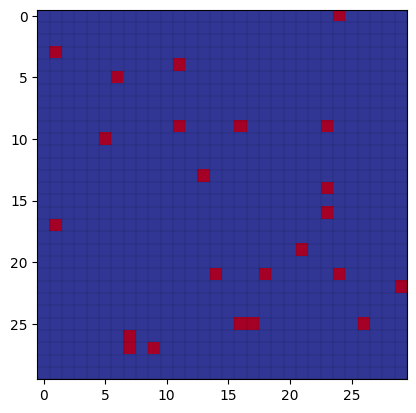

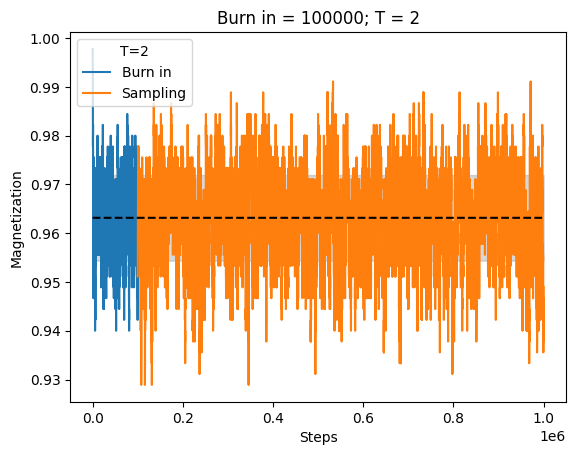

magnetization mean = 0.9631500000000005
magnetization std = 0.00877032982191578


In [73]:
temps = np.linspace(1,4,5)
B=np.linspace(-1,1,5)

#2d ising model:
m_values, lattice_spins, steps = spins(steps=STEPS, random=False)
plot_lattice(lattice_spins)
plot_m(m_values, burn_in = BURNIN)

In [79]:
m_mean=[]
m_std=[]
#B=np.linspace(-1,1,5)

for i, T in enumerate([1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4]):
    m_values, lattice, steps = spins(steps=STEPS, random=False, temp=T)
    m_mean.append(np.mean(m_values[BURNIN:]))
    m_std.append( np.std(m_values[BURNIN:]))

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

TypeError: spins() got an unexpected keyword argument 'B'

Text(0, 0.5, 'Net Magnetization')

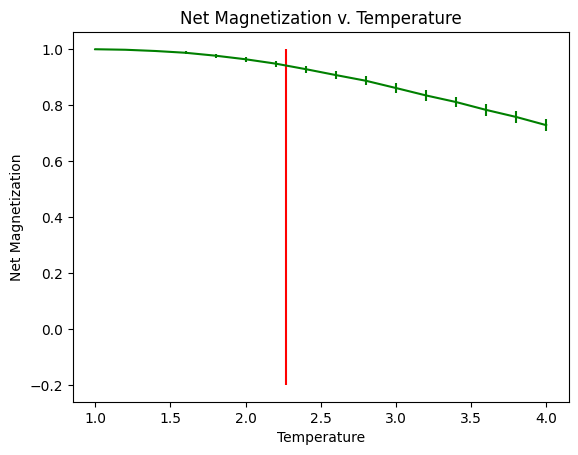

In [86]:
T=[1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4]

plt.errorbar(T, m_mean,  yerr=m_std, color='green')
plt.vlines([2.269], ymin=-0.2, ymax=1.0, color='red')
plt.title('Net Magnetization v. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Net Magnetization') 